In [ ]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy.stats import gaussian_kde
from scipy.integrate import simps
import scipy.stats as stats
from google.colab import drive

In [ ]:
#CONNECT TO INSURACE.CSV/READ INSURANCE.CSV
drive.mount('/content/drive')
df = pd.read_csv(r"/content/drive/MyDrive/FINAL PROJECT PROBABILITY/insurance.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**DESCRIPTIVE STATISTIC ANALYSIS**

In [ ]:
mean_age = df["age"].mean()
mean_bmi = df["bmi"].mean()
mean_children = df["children"].mean()
mean_charges = df["charges"].mean()
stdev_age = stat.stdev(df["age"])
stdev_bmi = stat.stdev(df["bmi"])
stdev_children = stat.stdev(df["children"])
stdev_charges = stat.stdev(df["charges"])

print(f"Rata-rata Umur adalah {mean_age:.2f} tahun dengan standar deviasi {stdev_age:.2f}")
print(f"Rata-rata BMI adalah {mean_bmi:.2f} dengan standar deviasi {stdev_bmi:.2f}")
print(f"Rata-rata Jumlah Anak adalah {mean_children:.2f} anak dengan standar deviasi {stdev_children:.2f}")
print(f"Rata-rata Charges adalah {mean_charges:.2f} dengan standar deviasi {stdev_charges:.2f}")

Rata-rata Umur adalah 39.21 tahun dengan standar deviasi 14.05
Rata-rata BMI adalah 30.66 dengan standar deviasi 6.10
Rata-rata Jumlah Anak adalah 1.09 anak dengan standar deviasi 1.21
Rata-rata Charges adalah 13270.42 dengan standar deviasi 12110.01


In [ ]:
df_smoker = df[df["smoker"]=="yes"]
df_nonsmoker = df[df["smoker"]=="no"]
mean_smoker = df_smoker["bmi"].mean()
std_smoker = stat.stdev(df_smoker["bmi"])
mean_nonsmoker = df_nonsmoker["bmi"].mean()
std_nonsmoker = stat.stdev(df_nonsmoker["bmi"])
print(f"Rata-rata BMI perokok adalah {mean_smoker:.2f} dengan standar deviasi {std_smoker:.2f}")
print(f"Rata-rata BMI non-perokok adalah {mean_nonsmoker:.2f} dengan standar deviasi {std_nonsmoker:.2f}")

Rata-rata BMI perokok adalah 30.71 dengan standar deviasi 6.32
Rata-rata BMI non-perokok adalah 30.65 dengan standar deviasi 6.04


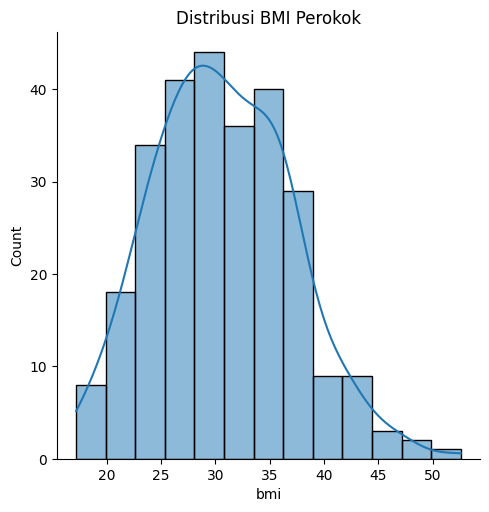

In [ ]:
sns.displot(df_smoker["bmi"], kde="True").set(title='Distribusi BMI Perokok')

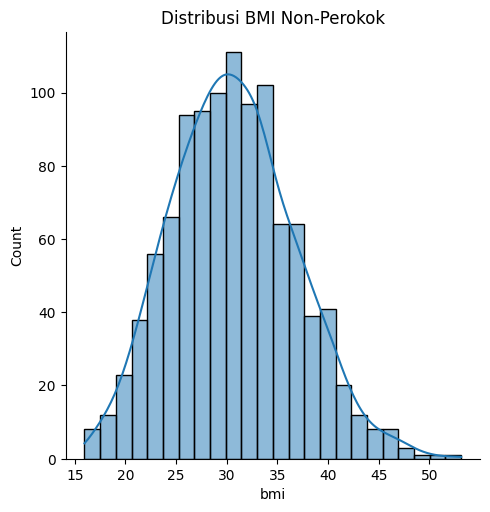

In [ ]:
sns.displot(df_nonsmoker["bmi"], kde="True").set(title='Distribusi BMI Non-Perokok')

In [ ]:
df_smoke_charges = df_smoker["charges"].var()
df_nonsmoke_charges = df_nonsmoker["charges"].var()
print(f"Variansi data charges pada perokok adalah {df_smoke_charges:.2f}")
print(f"Variansi data charges pada non-perokok adalah {df_nonsmoke_charges:.2f}")

Variansi data charges pada perokok adalah 133207311.21
Variansi data charges pada non-perokok adalah 35925420.50


[Text(0.5, 1.0, 'Boxplot Smoker terhadap Charges')]

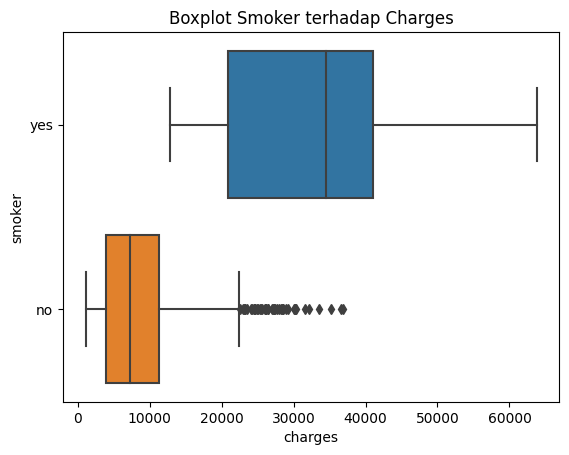

In [ ]:
sns.boxplot(data=df, x="charges", y="smoker").set(title='Boxplot Smoker terhadap Charges')

In [ ]:
mean_smoke_male = df_smoker[df_smoker["sex"] == "male"]["age"].mean()
mean_smoke_female = df_smoker[df_smoker["sex"] == "female"]["age"].mean()
std_smoke_male = stat.stdev(df_smoker[df_smoker["sex"] == "male"]["age"])
std_smoke_female = stat.stdev(df_smoker[df_smoker["sex"] == "female"]["age"])
print(f"Rata-rata perokok laki-laki berumur {mean_smoke_male:.2f} dengan standar deviasi {std_smoke_male:.2f}")
print(f"Rata-rata perokok perempuan berumur {mean_smoke_female:.2f} dengan standar deviasi {std_smoke_female:.2f}")

Rata-rata perokok laki-laki berumur 38.45 dengan standar deviasi 13.75
Rata-rata perokok perempuan berumur 38.61 dengan standar deviasi 14.22


[Text(0.5, 1.0, 'Sebaran Data Umur Perokok berdasarkan Gender')]

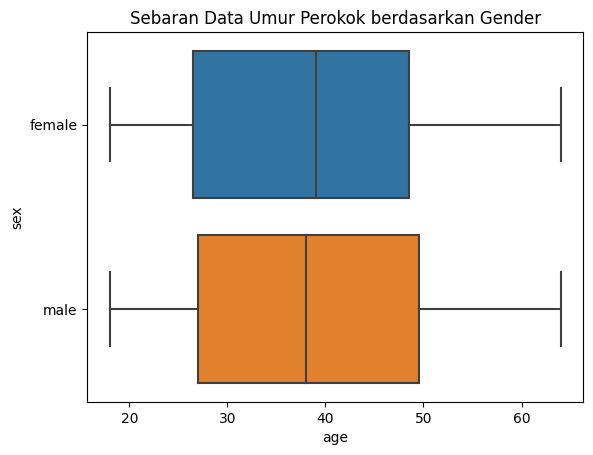

In [ ]:
sns.boxplot(data=df_smoker, x="age", y="sex").set(title='Sebaran Data Umur Perokok berdasarkan Gender')

In [ ]:
df_nonsmoker[df_nonsmoker["sex"] == "female"]["age"].mean()

39.691042047531994

In [ ]:
df_nonsmoker[df_nonsmoker["sex"] == "male"]["age"].mean()

39.06189555125725

In [ ]:
mean_smoker = df_smoker["charges"].mean()
mean_nonsmoker = df_nonsmoker["charges"].mean()
df_smoke_charges = df_smoker["charges"].var()
df_nonsmoke_charges = df_nonsmoker["charges"].var()
print(f"Rerata tagihan perokok adalah {mean_smoker:.2f} dengan standar deviasi {df_smoke_charges:.2f}")
print(f"Rerata tagihan non-perokok adalah  {mean_nonsmoker:.2f} dengan standar deviasi {df_nonsmoke_charges:.2f}")

Rerata tagihan perokok adalah 32050.23 dengan standar deviasi 133207311.21
Rerata tagihan non-perokok adalah  8434.27 dengan standar deviasi 35925420.50


<Axes: xlabel='charges', ylabel='smoker'>

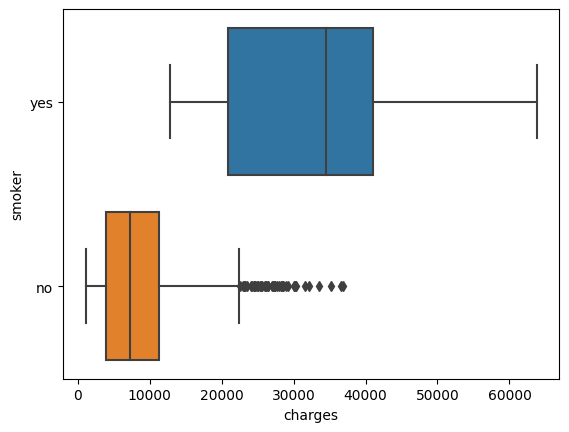

In [ ]:
sns.boxplot(data=df, x="charges", y="smoker")

In [ ]:
mean_bmi_smoker = df_smoker[df_smoker["bmi"]>=25]["charges"].mean()
mean_bmi_nonsmoker = df_nonsmoker[df_nonsmoker["bmi"]>=25]["charges"].mean()
print(f"Rerata tagihan perokok dengan BMI diatas 25 adalah {mean_bmi_smoker:.2f}")
print(f"Rerata tagihan non-perokok dengan BMI diatas 25 adalah  {mean_bmi_nonsmoker:.2f}")

Rerata tagihan perokok dengan BMI diatas 25 adalah 35116.91
Rerata tagihan non-perokok dengan BMI diatas 25 adalah  8633.96


In [ ]:
mean_bmi_female = df[df["sex"] == "female"]["bmi"].mean()
mean_bmi_male = df[df["sex"] == "male"]["bmi"].mean()
stdev_bmi_female = stat.stdev(df[df["sex"] == "female"]["bmi"])
stdev_bmi_male = stat.stdev(df[df["sex"] == "male"]["bmi"])
print(f"Rata-rata BMI perempuan adalah {mean_bmi_female:.2f} dengan standar deviasi {stdev_bmi_female:.2f}")
print(f"Rata-rata BMI laki-laki adalah {mean_bmi_male:.2f} dengan standar deviasi {stdev_bmi_male:.2f}")

Rata-rata BMI perempuan adalah 30.38 dengan standar deviasi 6.05
Rata-rata BMI laki-laki adalah 30.94 dengan standar deviasi 6.14


[Text(0.5, 1.0, 'Sebaran Data BMI berdasarkan Gender ')]

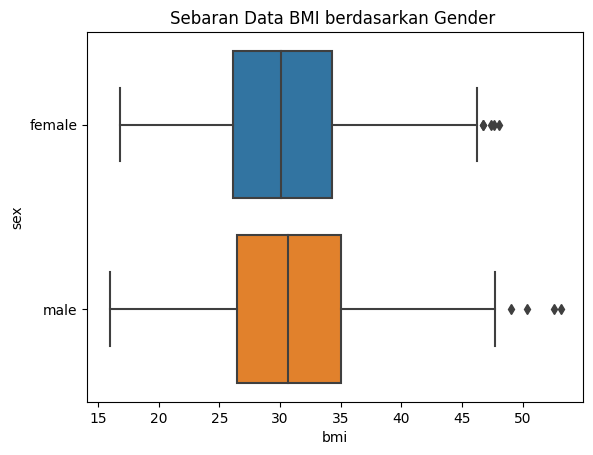

In [ ]:
sns.boxplot(data=df, x="bmi", y="sex").set(title='Sebaran Data BMI berdasarkan Gender ')

In [ ]:
mean_bmi_smoker = df_smoker["bmi"].mean()
mean_bmi_nonsmoker = df_nonsmoker["bmi"].mean()
stdev_bmi_smoker = stat.stdev(df_smoker["bmi"])
stdev_bmi_nonsmoker = stat.stdev(df_nonsmoker["bmi"])
print(f"Rata-rata BMI perokok adalah {mean_bmi_smoker:.2f} tahun dengan standar deviasi {stdev_bmi_smoker:.2f}")
print(f"Rata-rata BMI non-perokok adalah {mean_bmi_nonsmoker:.2f} tahun dengan standar deviasi {stdev_bmi_nonsmoker:.2f}")

Rata-rata BMI perokok adalah 30.71 tahun dengan standar deviasi 6.32
Rata-rata BMI non-perokok adalah 30.65 tahun dengan standar deviasi 6.04


[Text(0.5, 1.0, 'Sebaran Data BMI berdasarkan Perokok/Tidak Perokok')]

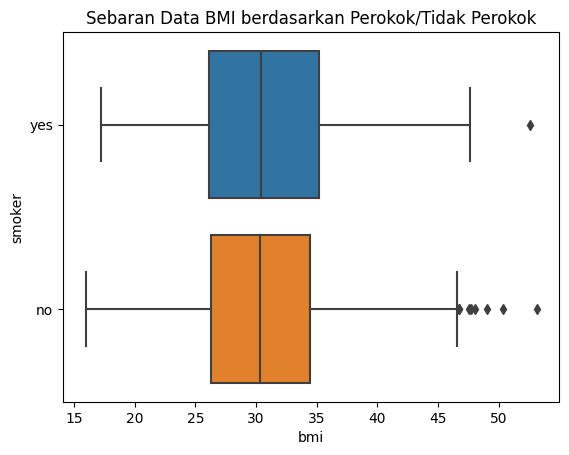

In [ ]:
sns.boxplot(data=df, x="bmi", y="smoker").set(title='Sebaran Data BMI berdasarkan Perokok/Tidak Perokok')

**CATEGORIC VARIABLE ANALYSIS (PMF)**

In [ ]:
mean_charge_male = df[df["sex"] == "male"]["charges"].mean()
mean_charge_female = df[df["sex"] == "female"]["charges"].mean()
stdev_charge_male = stat.stdev(df[df["sex"] == "male"]["charges"])
stdev_charge_female = stat.stdev(df[df["sex"] == "female"]["charges"])
print(f"Rata-rata tagihan laki-laki adalah {mean_charge_male:.2f} tahun dengan standar deviasi {stdev_charge_male:.2f}")
print(f"Rata-rata tagihan perempuan adalah {mean_charge_female:.2f} tahun dengan standar deviasi {stdev_charge_female:.2f}")

Rata-rata tagihan laki-laki adalah 13956.75 tahun dengan standar deviasi 12971.03
Rata-rata tagihan perempuan adalah 12569.58 tahun dengan standar deviasi 11128.70


[Text(0.5, 1.0, 'Sebaran Data Tagihan berdasarkan Gender')]

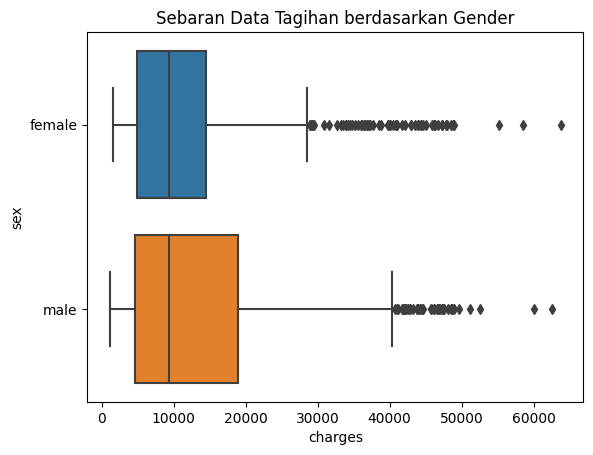

In [ ]:
sns.boxplot(data=df, x="charges", y="sex").set(title='Sebaran Data Tagihan berdasarkan Gender')

In [ ]:
df_region = pd.DataFrame(df.groupby(["region"])["age"].count())
df_region.rename(columns={"age":"jumlahuser"},inplace=True)
total_user = df_region.sum()[0]
df_region["peluang"] = df_region["jumlahuser"]/total_user
df_region

,jumlahuser,peluang
region,,
northeast,324,0.242152
northwest,325,0.242900
southeast,364,0.272048
southwest,325,0.242900


*Each Region Have Different Total and Distribution of Data*

In [ ]:
count_smoker = df[df["smoker"]=="yes"]["age"].count()
count_nonsmoker = df[df["smoker"]=="no"]["age"].count()


prop_smoker = count_smoker/(count_nonsmoker+count_smoker)
prop_nonsmoker = count_nonsmoker/(count_nonsmoker+count_smoker)

print(f"Jumlah dari perokok dalam sample adalah {count_smoker} dengan proporsi {prop_smoker:.2f}")
print(f"Jumlah dari non-perokok dalam sample adalah {count_nonsmoker} dengan proporsi {prop_nonsmoker:.2f}")

Jumlah dari perokok dalam sample adalah 274 dengan proporsi 0.20
Jumlah dari non-perokok dalam sample adalah 1064 dengan proporsi 0.80


[Text(0.5, 1.0, 'Proporsi Perokok dibanding Non-Perokok')]

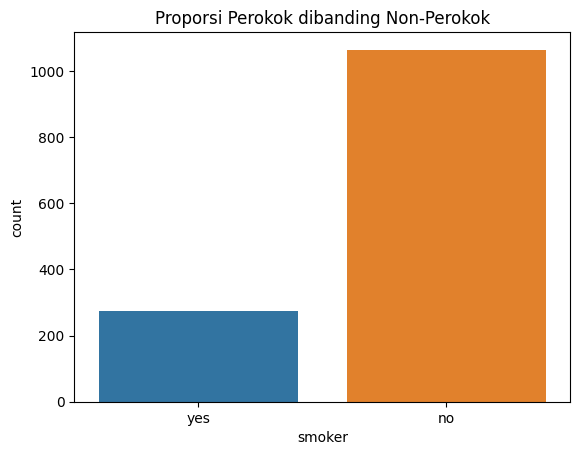

In [ ]:
sns.countplot(data=df, x="smoker").set(title='Proporsi Perokok dibanding Non-Perokok')

In [ ]:
n_female = df[df["sex"]=="female"].shape[0]
n_data = len(df.index)
prob_female = n_female/n_data

n_smoker = df[df["smoker"]=="yes"].shape[0]
prob_smoker = n_smoker/n_data

n_fem_smoker = df[(df["smoker"]=="yes")&(df["sex"]=="female")].shape[0]
prob_fem_smoker = n_fem_smoker/n_data

prob_fem_given_smoker = prob_fem_smoker / prob_smoker
print(f"Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah {prob_fem_given_smoker:.4f}")

Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah 0.4197


In [ ]:
n_male = df[df["sex"]=="male"].shape[0]
n_data = len(df.index)
prob_male = n_male/n_data

n_smoker = df[df["smoker"]=="yes"].shape[0]
prob_smoker = n_smoker/n_data

n_male_smoker = df[(df["smoker"]=="yes")&(df["sex"]=="male")].shape[0]
prob_male_smoker = n_male_smoker/n_data

prob_male_given_smoker = prob_male_smoker / prob_smoker
print(f"Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok adalah {prob_male_given_smoker:.4f}")

Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok adalah 0.5803


In [ ]:
df_northeast = df[df["region"]=="northeast"].sort_values(by="charges")
df_northwest = df[df["region"]=="northwest"].sort_values(by="charges")
df_southeast = df[df["region"]=="southeast"].sort_values(by="charges")
df_southwest = df[df["region"]=="southwest"].sort_values(by="charges")
median_northeast = stat.median(df_northeast["charges"])
median_northwest = stat.median(df_northwest["charges"])
median_southeast = stat.median(df_southeast["charges"])
median_southwest = stat.median(df_southwest["charges"])
print(f"Median tagihan untuk region Northeast adalah {median_northeast:.2f}")
print(f"Median tagihan untuk region Northwest adalah {median_northwest:.2f}")
print(f"Median tagihan untuk region Southeast adalah {median_southeast:.2f}")
print(f"Median tagihan untuk region Southwest adalah {median_southwest:.2f}")

Median tagihan untuk region Northeast adalah 10057.65
Median tagihan untuk region Northwest adalah 8965.80
Median tagihan untuk region Southeast adalah 9294.13
Median tagihan untuk region Southwest adalah 8798.59


**CHARGES DISTRIBUTION (REGION)**

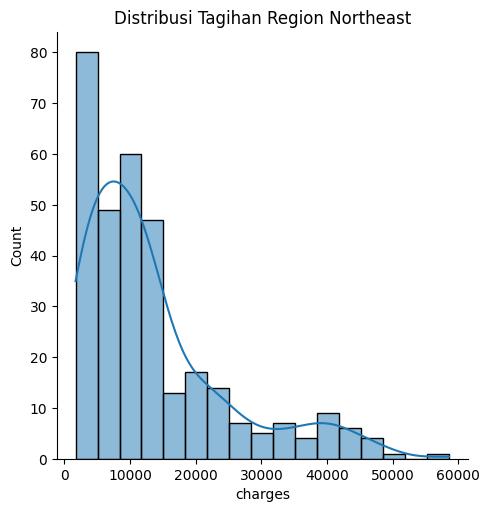

In [ ]:
sns.displot(df_northeast["charges"], kde="True").set(title="Distribusi Tagihan Region Northeast")

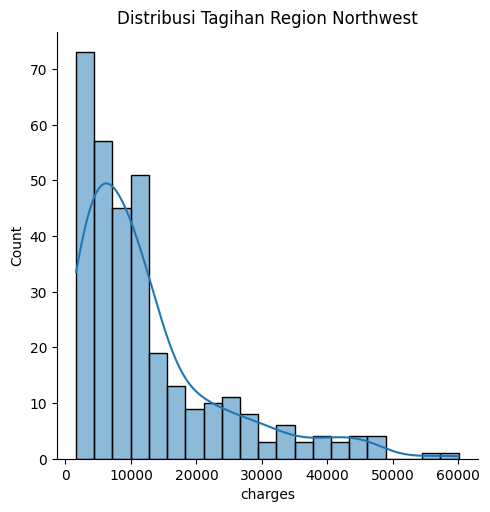

In [ ]:
sns.displot(df_northwest["charges"], kde="True").set(title="Distribusi Tagihan Region Northwest")

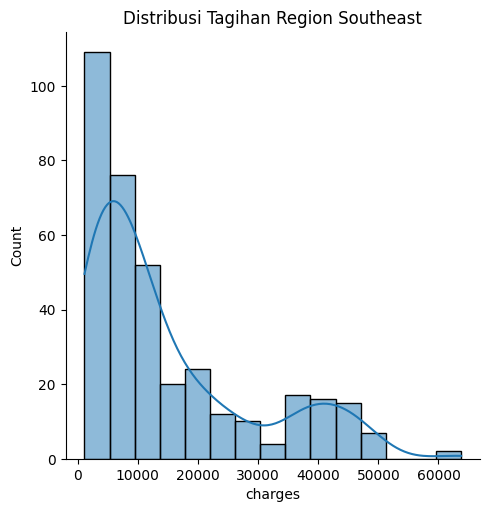

In [ ]:
sns.displot(df_southeast["charges"], kde="True").set(title="Distribusi Tagihan Region Southeast")

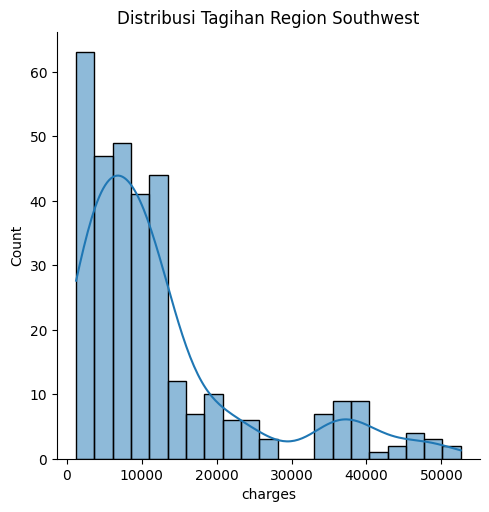

In [ ]:
sns.displot(df_southwest["charges"], kde="True").set(title="Distribusi Tagihan Region Southwest")

**CONTINOUS VARIABLE ANALYSIS (CDF)**

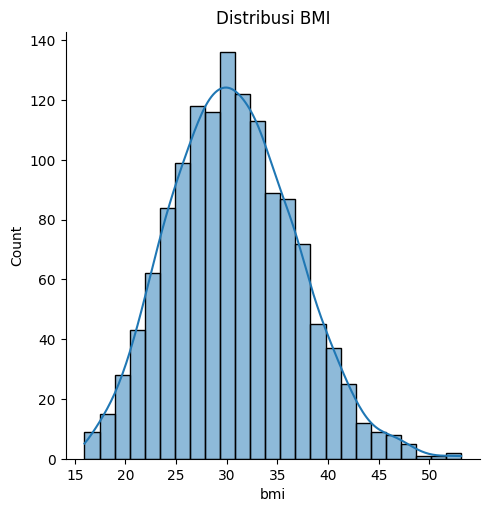

In [ ]:
sns.displot(df["bmi"], kde="True").set(title="Distribusi BMI")

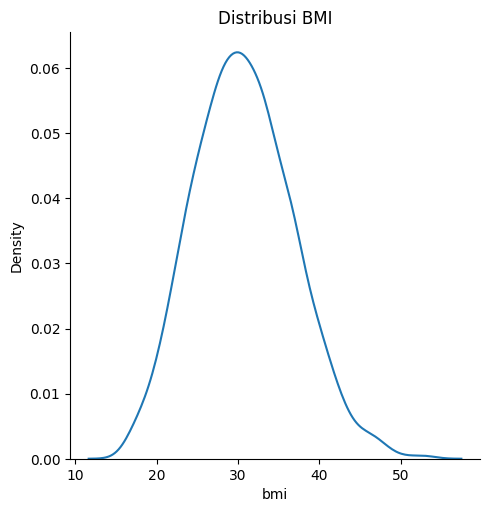

In [ ]:
sns.displot(df["bmi"], kind="kde").set(title="Distribusi BMI")

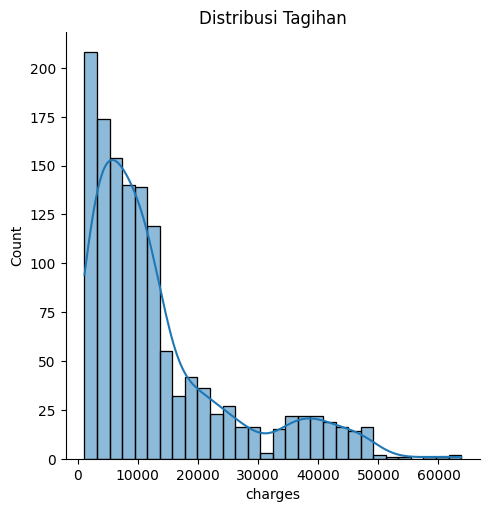

In [ ]:
sns.displot(df["charges"], kde="True").set(title="Distribusi Tagihan")

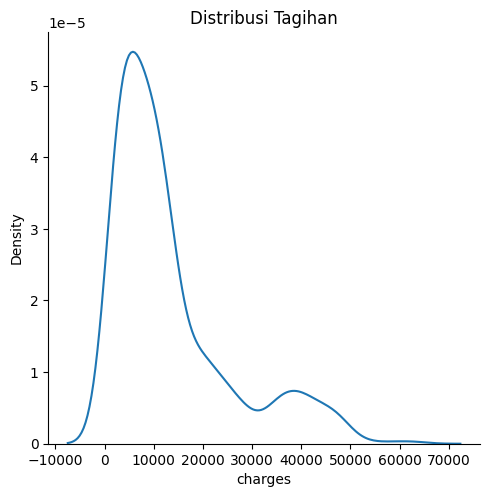

In [ ]:
sns.displot(df["charges"], kind="kde").set(title="Distribusi Tagihan")

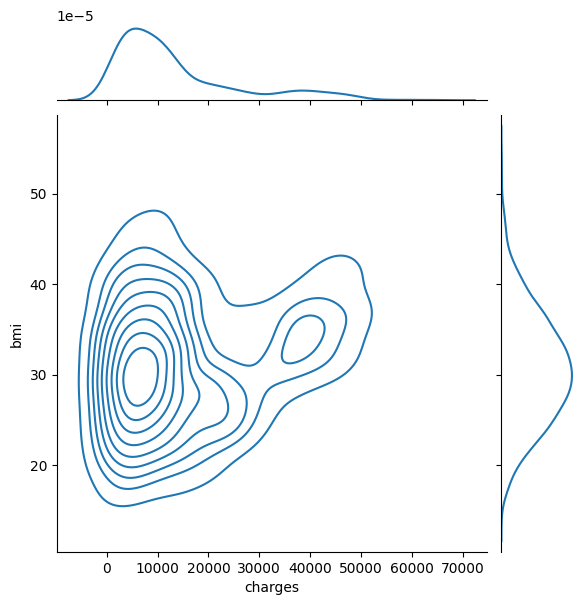

In [ ]:
sns.jointplot(x='charges', y='bmi', data=df, kind='kde')

*Health Bill : 16.700*

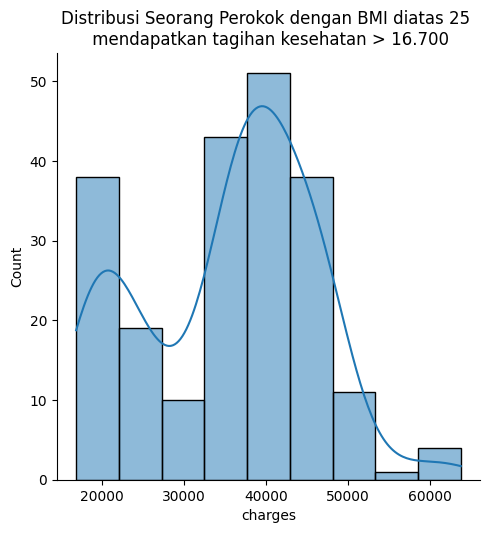

In [ ]:
df_smoker_bmi25 = df_smoker[df_smoker["bmi"]>=25]
df_16700 = df[df["charges"]>=16700]
df_smoker_bmi25_16700 = df_smoker_bmi25[df_smoker_bmi25["charges"]>=16700]
sns.displot(df_smoker_bmi25_16700["charges"], kde="True").set(title="Distribusi Seorang Perokok dengan BMI diatas 25 \n mendapatkan tagihan kesehatan > 16.700")

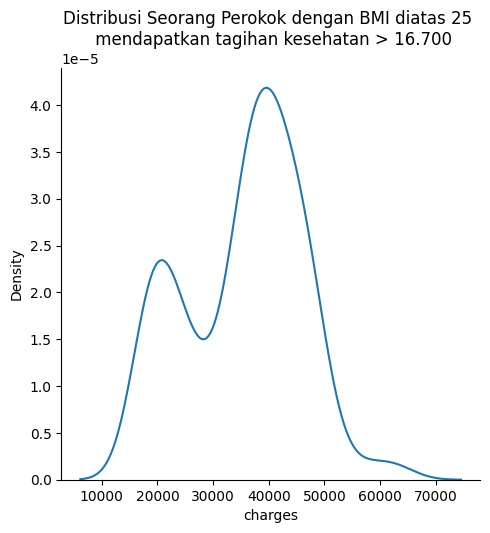

In [ ]:
sns.displot(df_smoker_bmi25_16700["charges"], kind="kde").set(title="Distribusi Seorang Perokok dengan BMI diatas 25 \n mendapatkan tagihan kesehatan > 16.700")

In [ ]:
n_smoker_bmi25_16700 = df_smoker_bmi25_16700["charges"].count()
n_smoker_bmi25 = df_smoker_bmi25["charges"].count()
n_16700 = df_16700["charges"].count()
n_data = df['charges'].count()

prob_smoker_bmi25 = n_smoker_bmi25 / n_data
prob_16700 = n_16700 / n_data
prob_smoker_bmi25_16700 = n_smoker_bmi25_16700 / n_data
prob_smoker_bmi25_given_16700 = prob_smoker_bmi25_16700 / prob_smoker_bmi25

print(f"Peluang seseorang tersebut perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16.700 adalah {prob_smoker_bmi25_given_16700:.4f}")

Peluang seseorang tersebut perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16.700 adalah 0.9817


In [ ]:
n_data = df['charges'].count()
n_smoker_16700 = df_smoker[df_smoker["charges"]>=16700]["charges"].count()

p_smoker = df_smoker["charges"].count() / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_smoker_16700 = n_smoker_16700 / n_data
p_16700_given_smoker = p_smoker_16700 / p_smoker

print(f"Peluang seseorang tersebut perokok akan mendapatkan tagihan kesehatan diatas 16.700  adalah {p_16700_given_smoker:.4f}")

Peluang seseorang tersebut perokok akan mendapatkan tagihan kesehatan diatas 16.700  adalah 0.9270


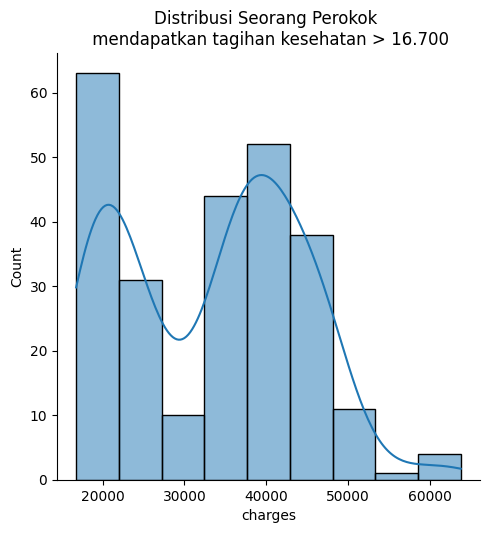

In [ ]:
sns.displot(df_smoker[df_smoker["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang Perokok \n mendapatkan tagihan kesehatan > 16.700")

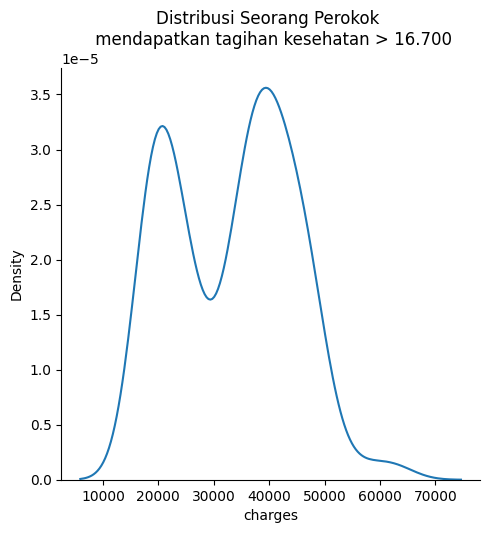

In [ ]:
sns.displot(df_smoker[df_smoker["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang Perokok \n mendapatkan tagihan kesehatan > 16.700")

In [ ]:
df_bmi_up = df[df["bmi"]>=25]
df_bmi_down = df[df["bmi"]<25]

#Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

n_data = df['charges'].count()
n_bmi_up = df_bmi_up["charges"].count()
n_bmi_up_16700 = df_bmi_up[df_bmi_up["charges"]>=16700]["charges"].count()

p_bmi_up = n_bmi_up / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_bmi_up_16700 = n_bmi_up_16700 / n_data
p_16700_given_bmi_up = p_bmi_up_16700 / p_bmi_up

print(f"Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k adalah {p_16700_given_bmi_up:.4f}")

Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k adalah 0.2589


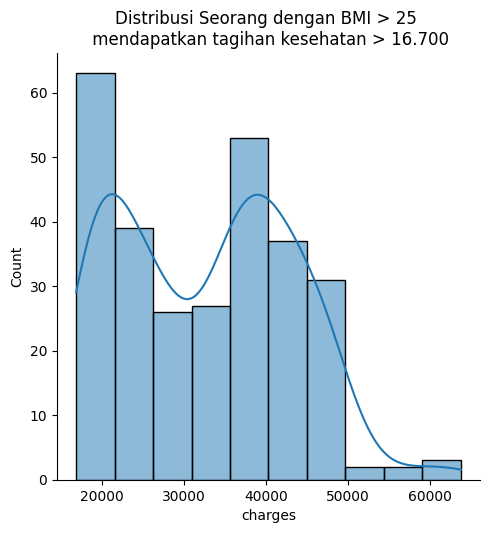

In [ ]:
sns.displot(df_bmi_up[df_bmi_up["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang dengan BMI > 25 \n mendapatkan tagihan kesehatan > 16.700")

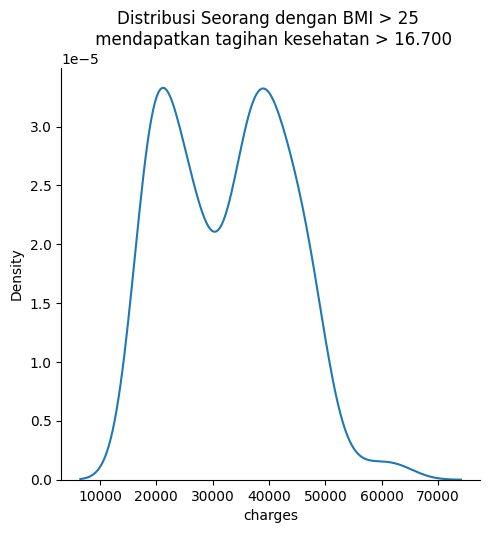

In [ ]:
sns.displot(df_bmi_up[df_bmi_up["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang dengan BMI > 25 \n mendapatkan tagihan kesehatan > 16.700")

In [ ]:
#Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

n_data = df['charges'].count()
n_bmi_down = df_bmi_down["charges"].count()
n_bmi_down_16700 = df_bmi_down[df_bmi_down["charges"]>=16700]["charges"].count()

p_bmi_down = n_bmi_down / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_bmi_down_16700 = n_bmi_down_16700 / n_data
p_16700_given_bmi_down = p_bmi_down_16700 / p_bmi_down
p_16700_given_bmi_down

print(f"Peluang seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k adalah {p_16700_given_bmi_down:.4f}")

print("Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k lebih tinggi dibanding seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k")

Peluang seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k adalah 0.2082
Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k lebih tinggi dibanding seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k


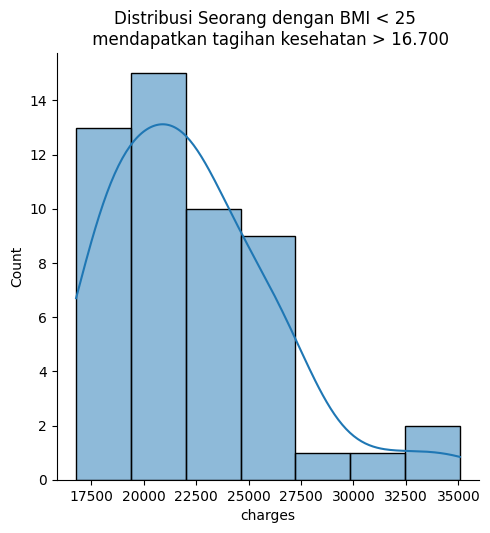

In [ ]:
sns.displot(df_bmi_down[df_bmi_down["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

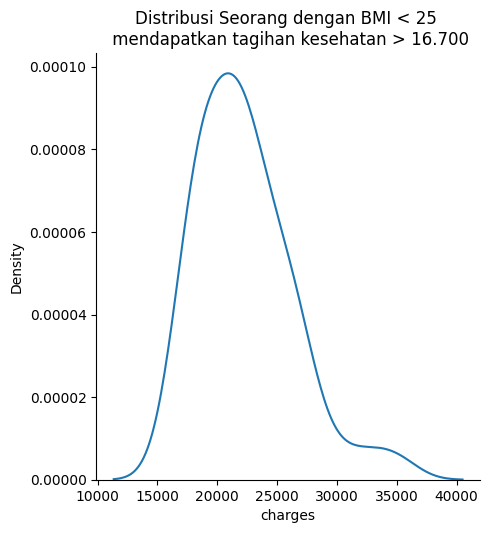

In [ ]:
sns.displot(df_bmi_down[df_bmi_down["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

In [ ]:
df_bmi_up_smoke = df_smoker[df_smoker["bmi"]>=25]
df_bmi_up_nonsmoke = df_nonsmoker[df_nonsmoker["bmi"]>=25]

#Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

n_data = df['charges'].count()
n_bmi_up_smoke = df_bmi_up_smoke["charges"].count()
n_bmi_up_smoke_16700 = df_bmi_up_smoke[df_bmi_up_smoke["charges"]>=16700]["charges"].count()

p_bmi_up_smoke = n_bmi_up_smoke / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_bmi_up_smoke_16700 = n_bmi_up_smoke_16700 / n_data
p_16700_given_bmi_up_smoke = p_bmi_up_smoke_16700 / p_bmi_up_smoke

print(f"Peluang seseorang perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k adalah {p_16700_given_bmi_up_smoke:.4f}")

Peluang seseorang perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k adalah 0.9817


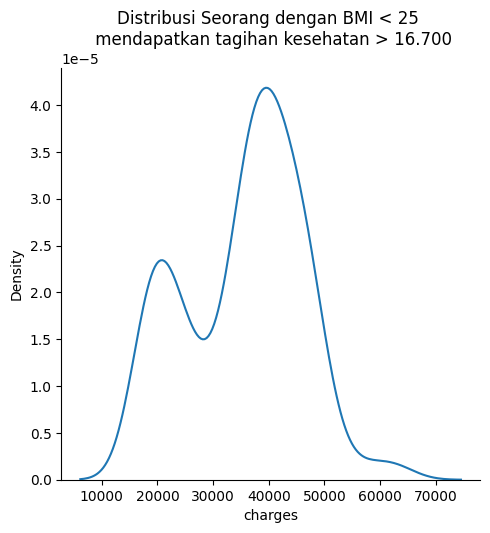

In [ ]:
sns.displot(df_bmi_up_smoke[df_bmi_up_smoke["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

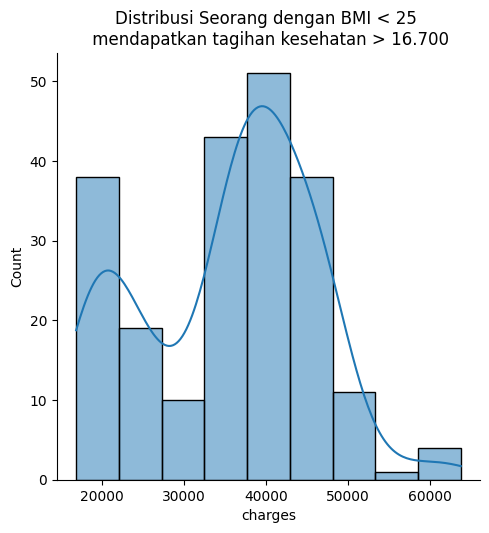

In [ ]:
sns.displot(df_bmi_up_smoke[df_bmi_up_smoke["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

In [ ]:
#Seseorang non-perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

n_data = df['charges'].count()
n_bmi_up_nonsmoke = df_bmi_up_nonsmoke["charges"].count()
n_bmi_up_nonsmoke_16700 = df_bmi_up_nonsmoke[df_bmi_up_nonsmoke["charges"]>=16700]["charges"].count()

p_bmi_up_nonsmoke = n_bmi_up_nonsmoke / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_bmi_up_nonsmoke_16700 = n_bmi_up_nonsmoke_16700 / n_data
p_16700_given_bmi_up_nonsmoke = p_bmi_up_nonsmoke_16700 / p_bmi_up_nonsmoke

print(f"Peluang seseorang non-perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k adalah {p_16700_given_bmi_up_nonsmoke:.4f}")

Peluang seseorang non-perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k adalah 0.0778


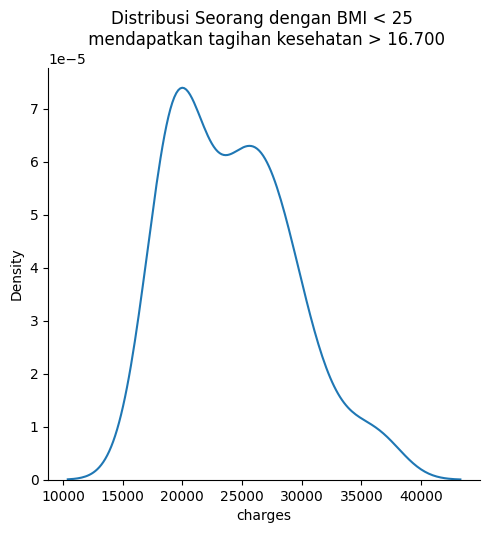

In [ ]:
sns.displot(df_bmi_up_nonsmoke[df_bmi_up_nonsmoke["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

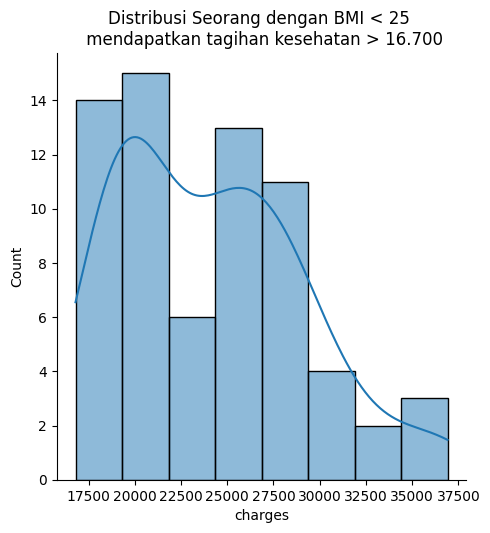

In [ ]:
sns.displot(df_bmi_up_nonsmoke[df_bmi_up_nonsmoke["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

**VARIABLE CORRELATION ANALYSIS**

<ipython-input-86-d9a0ca6a001b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


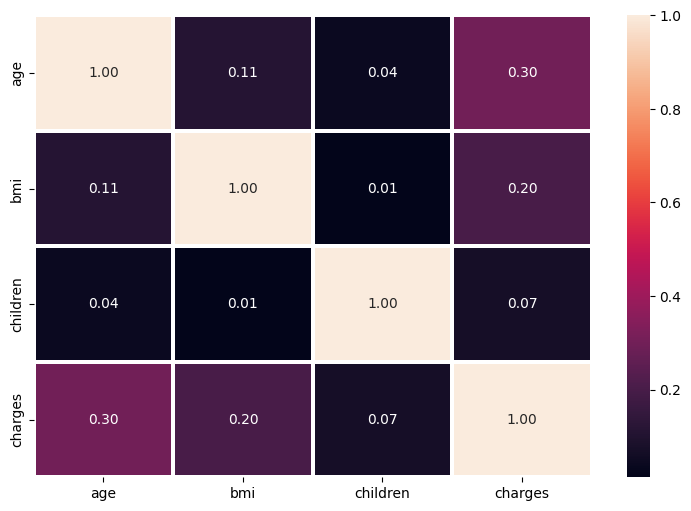

In [ ]:
corr = df.corr()

f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot=True, linewidth=1.5, fmt ='.2f', ax=ax)
plt.show()

In [ ]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
pd_transform = pd.get_dummies(df, columns=['region','smoker','sex'])

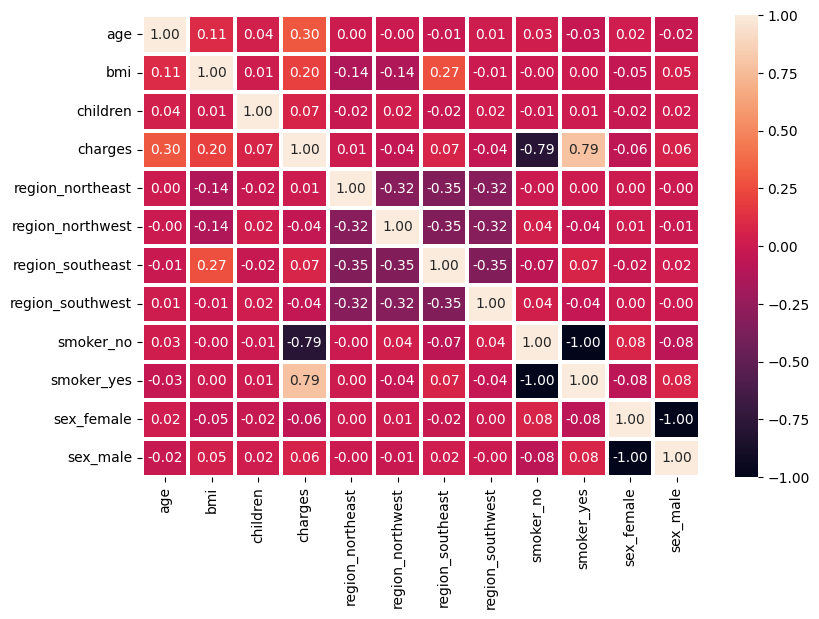

In [ ]:
corr2 = pd_transform.corr()

f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr2, annot=True, linewidth=1.5, fmt ='.2f', ax=ax)
plt.show()

In [ ]:
corr2

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
age,1.000000,0.109272,0.042469,0.299008,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750,-0.046371,0.046371
children,0.042469,0.012759,1.000000,0.067998,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673,-0.017163,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.006349,-0.039905,0.073982,-0.043210,-0.787251,0.787251,-0.057292,0.057292
region_northeast,0.002475,-0.138156,-0.022808,0.006349,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811,0.002425,-0.002425
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945,0.011156,-0.011156
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498,-0.017117,0.017117
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945,0.004184,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,-0.002811,0.036945,-0.068498,0.036945,1.000000,-1.000000,0.076185,-0.076185
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.002811,-0.036945,0.068498,-0.036945,-1.000000,1.000000,-0.076185,0.076185


**HYPOTESIS TESTING**

<ipython-input-91-f82b53ccaa00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig_a = sns.distplot(df_smoker["charges"], axlabel='charges', kde=True)
<ipython-input-91-f82b53ccaa00>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig_b = sns.distplot(df_nonsmoker["charges"], axlabel='charges', kde=True)


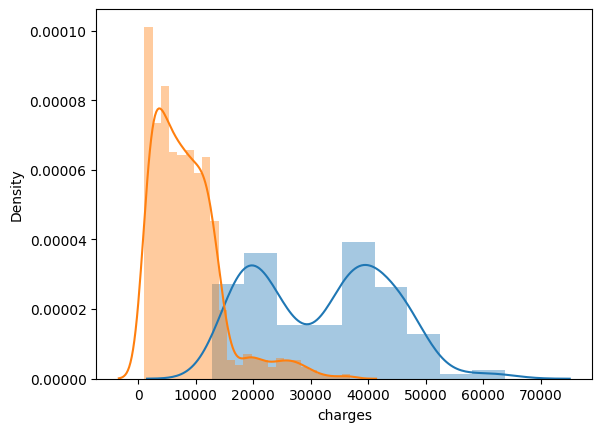

In [ ]:
# plotting charges smoker and charges non-smoker distribution on the same figure
fig_a = sns.distplot(df_smoker["charges"], axlabel='charges', kde=True)
fig_b = sns.distplot(df_nonsmoker["charges"], axlabel='charges', kde=True)
plt.show()

In [ ]:
smoker_series = pd.Series(df_smoker["charges"]).array
nonsmoker_series = pd.Series(df_nonsmoker["charges"]).array

In [ ]:
from scipy.stats import ttest_ind

t, pvalue = stats.mannwhitneyu(smoker_series, nonsmoker_series, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print(f'Statistics = {t}, p-value = {pvalue}')

Statistics = 284133.0, p-value = 1.0


<ipython-input-94-ad16f496160e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig_c = sns.distplot(df[df["bmi"]>=25]["charges"], axlabel='charges', kde=True)
<ipython-input-94-ad16f496160e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig_d = sns.distplot(df[df["bmi"]<25]["charges"], axlabel='charges', kde=True)


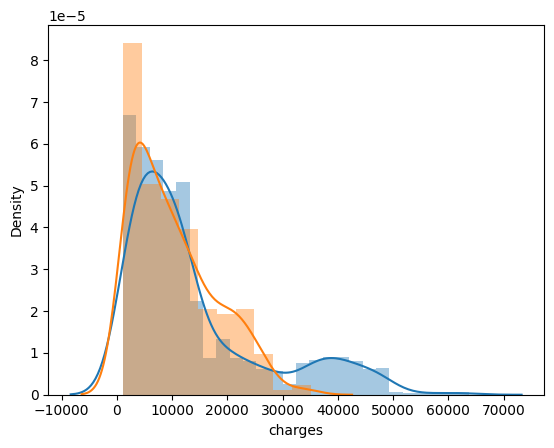

In [ ]:
# plotting charges bmi > 25 and charges bmi < 25 distribution on the same figure
fig_c = sns.distplot(df[df["bmi"]>=25]["charges"], axlabel='charges', kde=True)
fig_d = sns.distplot(df[df["bmi"]<25]["charges"], axlabel='charges', kde=True)
plt.show()

In [ ]:
bmiup25_series = pd.Series(df[df["bmi"]>=25]["charges"]).array
bmilow25_series = pd.Series(df[df["bmi"]<25]["charges"]).array

In [ ]:
bmiup25_series.mean()

13940.237872405307

In [ ]:
bmilow25_series.mean()

10282.224474367347

In [ ]:
t, pvalue = stats.mannwhitneyu(bmiup25_series, bmilow25_series, alternative='less') # equal_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print(f'Statistics = {t}, p-value = {pvalue}')

Statistics = 148803.0, p-value = 0.996812175836968


<ipython-input-100-c7086d23a020>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig_c = sns.distplot(df[df["sex"]=="male"]["bmi"], axlabel='bmi', kde=True)
<ipython-input-100-c7086d23a020>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig_d = sns.distplot(df[df["sex"]=="female"]["bmi"], axlabel='bmi', kde=True)


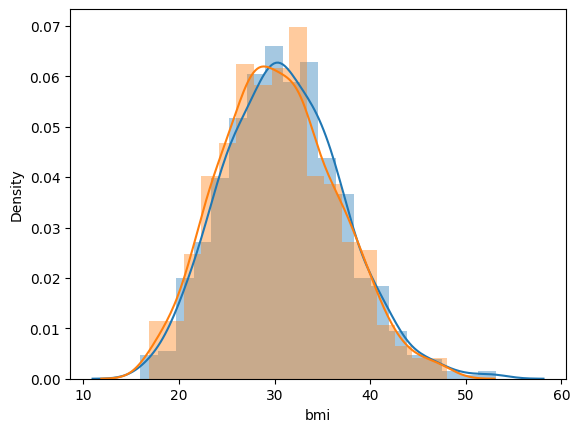

In [ ]:
# plotting bmi male and bmi female distribution on the same figure
fig_c = sns.distplot(df[df["sex"]=="male"]["bmi"], axlabel='bmi', kde=True)
fig_d = sns.distplot(df[df["sex"]=="female"]["bmi"], axlabel='bmi', kde=True)
plt.show()

In [ ]:
bmi_male_series = pd.Series(df[df["sex"]=="male"]["bmi"]).array
bmi_female_series = pd.Series(df[df["sex"]=="female"]["bmi"]).array

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = bmi_male_series, b = bmi_female_series, equal_var=False, alternative='two-sided') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print(f'Statistics = {stat}, p-value = {p}')

Statistics = 1.697027933124022, p-value = 0.08992430667834876


<ipython-input-103-1a209f1fcc31>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig_e = sns.distplot(df[df["sex"]=="male"]["charges"], axlabel='charges', kde=True)
<ipython-input-103-1a209f1fcc31>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig_f = sns.distplot(df[df["sex"]=="female"]["charges"], axlabel='charges'

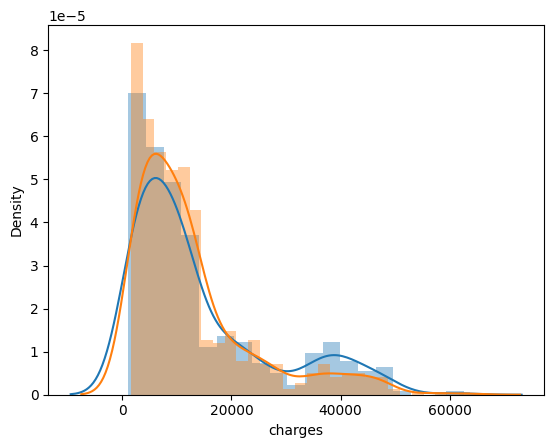

In [ ]:
# plotting charges male and charges female distribution on the same figure
fig_e = sns.distplot(df[df["sex"]=="male"]["charges"], axlabel='charges', kde=True)
fig_f = sns.distplot(df[df["sex"]=="female"]["charges"], axlabel='charges', kde=True)
plt.show()

In [ ]:
male_series = pd.Series(df[df["sex"]=="male"]["charges"]).array
female_series = pd.Series(df[df["sex"]=="female"]["charges"]).array

In [ ]:
t, pvalue = stats.mannwhitneyu(male_series, female_series, alternative='less')
# Interpretasi Hasil
print(f'Statistics = {t}, p-value = {pvalue}')

Statistics = 226208.0, p-value = 0.6357276125750675
